In [ ]:
# подключение необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# загрузка данных
df = pd.read_csv("heart.csv")

In [ ]:
# отображение первых 5 строк из датасета
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# вывод основных статистических показателей
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# проверка на отсутствующие значения
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# и для работы с матрицами
import numpy as np

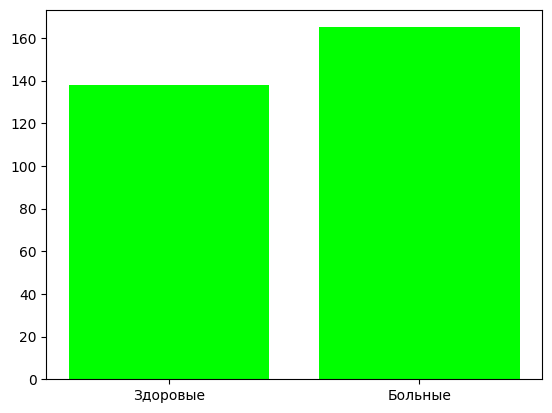

In [ ]:
# построение столбцовой диаграммы здоровые/больные
c_list = [(df["target"]==0).sum(), (df["target"]==1).sum()] # value_counts
l_list = ["Здоровые", "Больные"]

plt.bar(l_list, c_list, color=(0, 1, 0))

plt.show()

In [ ]:
# фильтрация данных по условию здоровый/больной
thalach_h = df["thalach"].where(df["target"]==0)
age_h = df["age"].where(df["target"]==0)
thalach_uh = df["thalach"].where(df["target"]==1)
age_uh = df["age"].where(df["target"]==1)

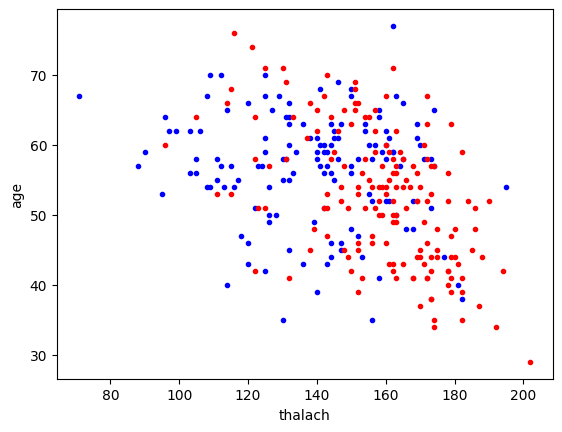

In [ ]:
# визуализация - диаграмма рассеяния
plt.scatter(thalach_h, age_h, color="blue", marker=".")
plt.scatter(thalach_uh, age_uh, color="red", marker=".")
plt.xlabel("thalach")
plt.ylabel("age")
plt.show()

In [ ]:
# словарь для отображения категориальных переменных
sex_map = {0: "female", 1: "male"}

In [ ]:
# замена категориальной переменной
df["sex"] = df["sex"].map(sex_map)

In [ ]:
# отображение
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# ввод фиктивных переменных для подстановки
df = pd.get_dummies(df, columns=["sex"], dtype="int")

In [ ]:
# отображение первых 5 строк
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_female,sex_male
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


In [ ]:
df["chol"].where(df["target"] == 0).mean().item()

251.08695652173913

In [ ]:
df["chol"].where(df["target"] == 1).mean().item()

242.23030303030302

In [ ]:
# нормализация
features = ["age", "trestbps", "chol", "thalach"]

for column in features:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_female,sex_male
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.966997,0.354941,0.274575,0.148515,0.528053,0.600358,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.316832,0.683168
std,0.189210,1.032052,0.165454,0.118335,0.356198,0.525860,0.174849,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.466011,0.466011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.541667,1.000000,0.339623,0.260274,0.000000,1.000000,0.625954,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
75%,0.666667,2.000000,0.433962,0.339041,0.000000,1.000000,0.725191,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000
